In [ ]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import json
from sqlalchemy import text
from src.db_connect import get_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Create engine
engine = get_engine()

In [3]:
df_customers = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.customers_raw;'), con=engine)
df_products = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.products_raw;'), con=engine)
df_transactions = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.transactions_raw;'), con=engine)
df_click_stream = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.click_stream_raw;'), con=engine)

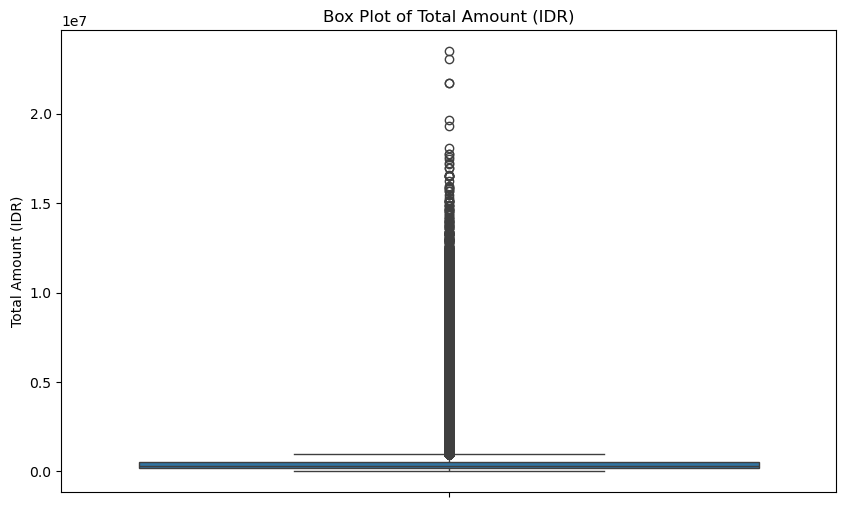

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_transactions['total_amount'])
plt.title('Box Plot of Total Amount (IDR)')
plt.ylabel('Total Amount (IDR)')
plt.show()

In [ ]:
print(f"Minimum Transaction Amount: IDR {df_transactions['total_amount'].min():,.2f}")
print(f"Maximum Transaction Amount: IDR {df_transactions['total_amount'].max():,.2f}")
print(f"Average (Mean) Transaction Amount: IDR {df_transactions['total_amount'].mean():,.2f}")
print(f"Middle Value (Median) Transaction Amount: IDR {df_transactions['total_amount'].median():,.2f}")
print(f"Standard Deviation: IDR {df_transactions['total_amount'].std():,.2f}")


--- Summary Statistics for Total Amount (IDR) ---
Minimum Transaction Amount: IDR 10,898.00
Maximum Transaction Amount: IDR 23,504,487.00
Average (Mean) Transaction Amount: IDR 549,916.52
Middle Value (Median) Transaction Amount: IDR 302,989.00
Standard Deviation: IDR 815,376.14


In [14]:
print("\n--- Top 10 Transactions by Total Amount (Potential High Outliers) ---")
top_transactions = df_transactions.sort_values(by='total_amount', ascending=False).head(10)
top_transactions



--- Top 10 Transactions by Total Amount (Potential High Outliers) ---


,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_metadata_parsed
524299,2020-02-29 18:13:22.812328,85994,605d6152-6a20-45e5-89b8-ca8b88650f09,df469aed-a6c0-4c12-9abf-c9dbbf7d45d4,"[{'product_id': 13927, 'quantity': 23, 'item_p...",Credit Card,Success,0.0,None,10000.0,2020-03-06,-9.334376,124.759029,23504487.0,None
345555,2019-07-01 13:49:46.501296,22056,c6f981ff-2f4a-458e-ab69-757b217c8f2c,daf017ab-4cfc-4bbf-b529-626b6b1e08e3,"[{'product_id': 16804, 'quantity': 48, 'item_p...",Credit Card,Success,0.0,None,15000.0,2019-07-03,3.572361,125.553534,23068840.0,None
721969,2022-04-15 04:50:22.539277,44577,1807d3fb-c10a-40da-85aa-08acc969cc4b,372c96c5-87cb-4da4-89a0-d3c48ed60e00,"[{'product_id': 39551, 'quantity': 1, 'item_pr...",Debit Card,Success,4026.0,AZ2022,5000.0,2022-04-20,-6.885359,108.182834,21703815.0,None
140264,2021-09-04 18:42:56.025705,49218,31c29134-9f0d-45af-9685-886b41cf3a37,5108d910-67f2-4e98-a6ca-baee17686579,"[{'product_id': 28991, 'quantity': 1, 'item_pr...",Debit Card,Success,4026.0,WEEKENDSERU,0.0,2021-09-09,-7.982283,113.968319,21698815.0,None
148234,2021-04-30 20:04:33.014974,95123,80db0bba-f599-4b52-b9a8-c09748354dd2,272e62f2-0e0e-41ff-9ca8-c5ef7537991c,"[{'product_id': 8237, 'quantity': 35, 'item_pr...",OVO,Success,0.0,None,50000.0,2021-05-03,-8.364713,120.480056,19636054.0,None
102504,2020-04-02 17:16:04.459094,73718,ff32e095-a587-44e1-8218-9a7721988158,5dc07f48-1332-40f3-b127-11881371cbb2,"[{'product_id': 8407, 'quantity': 1, 'item_pri...",Credit Card,Success,0.0,None,10000.0,2020-04-04,-6.283353,106.849304,19298582.0,None
762221,2021-12-14 17:51:07.965542,56699,ad2f6b41-741f-4033-a757-6b1b7b0d75b5,a3463047-15bc-4f36-98c2-02fe39d34db2,"[{'product_id': 23313, 'quantity': 9, 'item_pr...",Credit Card,Success,0.0,None,10000.0,2021-12-18,-6.139476,106.695924,18074205.0,None
395228,2022-03-12 21:38:56.585271,5428,a6266adf-022d-4fcc-bed8-ea4dd7085d71,3d4c1f59-0652-4a35-acbf-ab677f8d313b,"[{'product_id': 58314, 'quantity': 27, 'item_p...",Debit Card,Success,0.0,None,10000.0,2022-03-14,-7.910734,112.089843,17749638.0,None
600883,2022-03-13 08:23:27.624683,8121,95ede5d6-6f35-402d-b43b-a24dd9380fb7,6240401b-7f69-4f40-8874-f98463014dd1,"[{'product_id': 57589, 'quantity': 1, 'item_pr...",Credit Card,Success,0.0,None,10000.0,2022-03-17,-8.551459,116.409935,17741587.0,None
704988,2019-10-14 04:33:13.528677,29105,0a5d5e25-59db-4e17-8169-8a68453326bf,5cc08a38-9f4e-41fe-bb57-fc0daa27f659,"[{'product_id': 24574, 'quantity': 31, 'item_p...",OVO,Success,8548.0,STARTUP,10000.0,2019-10-18,-1.566359,133.671850,17608503.0,None


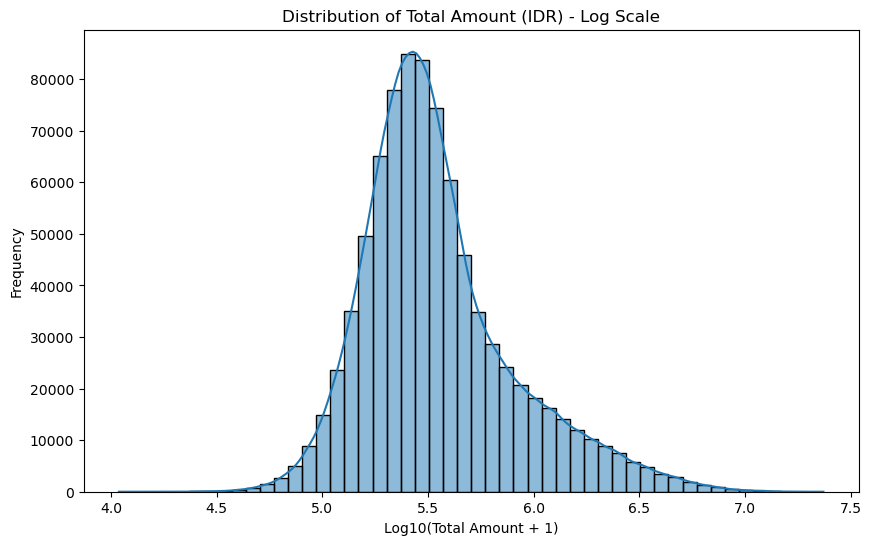

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_transactions['total_amount'].apply(lambda x: np.log10(x + 1)), bins=50, kde=True)
plt.title('Distribution of Total Amount (IDR) - Log Scale')
plt.xlabel('Log10(Total Amount + 1)') # Label indicates it's a log scale
plt.ylabel('Frequency')
plt.show()

In [ ]:
''' 
Most orders are for smaller amounts, around IDR 383,000.
But, we also have some very large orders, going up to IDR 23.6 million.
These big orders seem real (not mistakes).
'''

In [20]:
df_transactions['product_metadata']


0         [{'product_id': 54728, 'quantity': 1, 'item_pr...
1         [{'product_id': 16193, 'quantity': 1, 'item_pr...
2         [{'product_id': 53686, 'quantity': 4, 'item_pr...
3         [{'product_id': 20228, 'quantity': 1, 'item_pr...
4         [{'product_id': 55220, 'quantity': 1, 'item_pr...
                                ...                        
852579    [{'product_id': 30642, 'quantity': 2, 'item_pr...
852580    [{'product_id': 19394, 'quantity': 1, 'item_pr...
852581    [{'product_id': 13079, 'quantity': 4, 'item_pr...
852582    [{'product_id': 11312, 'quantity': 1, 'item_pr...
852583    [{'product_id': 47433, 'quantity': 1, 'item_pr...
Name: product_metadata, Length: 852584, dtype: object

In [27]:

import json

print("\n--- Exploring product_metadata in df_transactions ---")
# Look at the first few rows of product_metadata
print("Sample raw product_metadata:")
print(df_transactions['product_metadata'].head())

# Try to parse one or two samples to understand the structure
sample_metadata_string = df_transactions['product_metadata'].iloc[0] # Get the first one
print(f"\nParsing sample_metadata_string:\n{sample_metadata_string}")

try:
    parsed_metadata = json.loads(sample_metadata_string)
    print("\nSuccessfully parsed sample_metadata (first item):")
    print(parsed_metadata[0]) # Assuming it's a list, show the first product item
except json.JSONDecodeError as e:
    print(f"Error parsing JSON: {e}")
    print("The product_metadata might not be a valid JSON string or its format is inconsistent.")

# You can also try to parse a few more to confirm the structure
# df_transactions['parsed_product_metadata'] = df_transactions['product_metadata'].apply(lambda x: json.loads(x) if pd.notna(x) else None)
# print("\nFirst parsed product metadata (first 3 rows):")
# print(df_transactions['parsed_product_metadata'].head(3))


--- Exploring product_metadata in df_transactions ---
Sample raw product_metadata:
0    [{'product_id': 54728, 'quantity': 1, 'item_pr...
1    [{'product_id': 16193, 'quantity': 1, 'item_pr...
2    [{'product_id': 53686, 'quantity': 4, 'item_pr...
3    [{'product_id': 20228, 'quantity': 1, 'item_pr...
4    [{'product_id': 55220, 'quantity': 1, 'item_pr...
Name: product_metadata, dtype: object

Parsing sample_metadata_string:
[{'product_id': 54728, 'quantity': 1, 'item_price': 191247}]
Error parsing JSON: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)
The product_metadata might not be a valid JSON string or its format is inconsistent.
